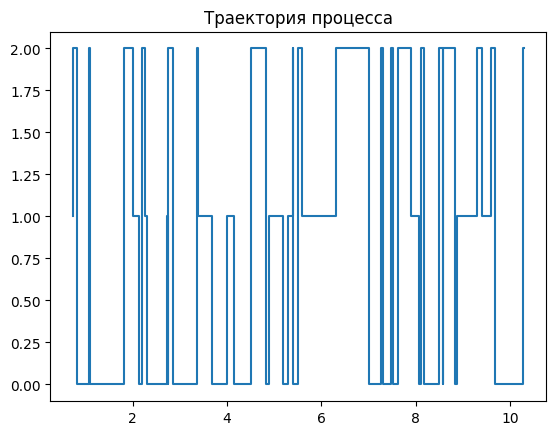

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd

#1#
#Матрица вложенной цепи#
n = 50
P = [[0, 1/4, 3/4],[2/3, 0, 1/3],[3/5, 2/5, 0]]
track = []
time = []
prev = 0
for i in range(n):
  curr = np.random.choice([0, 1, 2], p = P[prev])
  track.append(curr)
  if(curr==0):
    time.append(np.random.exponential(1)/4)
  elif(curr==1):
    time.append(np.random.exponential(1)/3)
  else:
    time.append(np.random.exponential(1)/5)
  prev = curr
for i in range(1,len(time)):
  time[i]+=time[i-1]

plt.title("Траектория процесса")
plt.step(time, track)


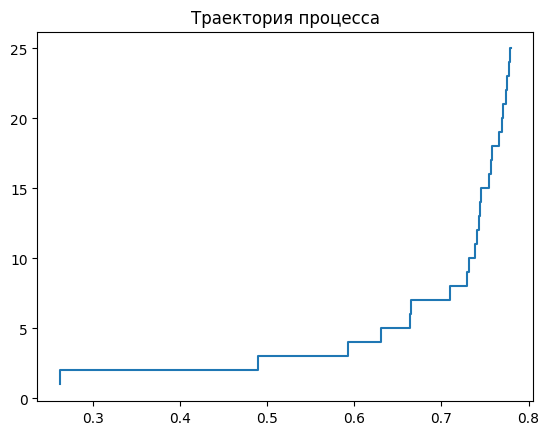

In [ ]:
#2#
n = 25
prev = 0
track = []
time = []

for i in range(n):
  curr = prev+1
  #time
  time.append(np.random.exponential(1)/curr**2)
  track.append(curr)
  prev = curr

for i in range(1,len(time)):
  time[i]+=time[i-1]

plt.title("Траектория процесса")
plt.step(time, track)

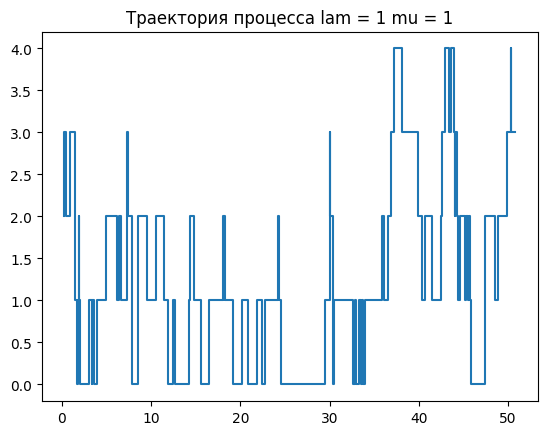

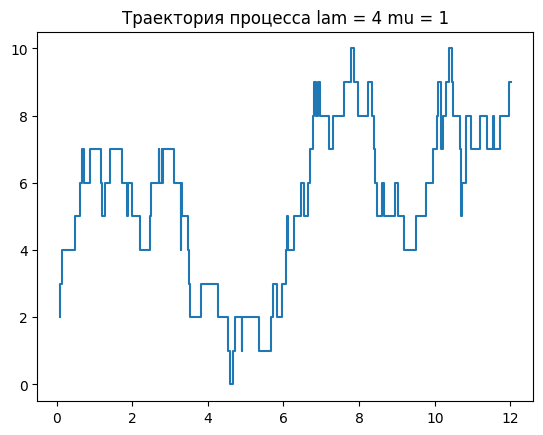

In [ ]:
#3#
#a#
n = 100
prev = 1
lam = 1
mu = 1
track = []
time = []
for i in range(n):
  if(prev==1 or prev==2 or prev==3 ):
    curr = np.random.choice([prev-1, prev+1], p = [prev*mu/(prev*mu+lam), lam/(prev*mu+lam)])
  elif(prev==0):
    curr = 1
  else:
    curr = np.random.choice([prev-1, prev+1], p = [3*mu/(3*mu+lam), lam/(3*mu+lam)])
  track.append(curr)
  #time
  if(curr==0):
    time.append(np.random.exponential(1)/lam)
  elif(curr==1):
    time.append(np.random.exponential(1)/(mu+lam))
  elif(curr==2):
    time.append(np.random.exponential(1)/(2*mu+lam))
  else:
    time.append(np.random.exponential(1)/(3*mu+lam))
  prev = curr

for i in range(1,len(time)):
  time[i]+=time[i-1]

plt.title("Траектория процесса lam = 1 mu = 1")
plt.step(time, track)

#b#
lam = 4
mu = 1
track_1 = []
time_1 = []
for i in range(n):
  if(prev==1 or prev==2 or prev==3 ):
    curr = np.random.choice([prev-1, prev+1], p = [prev*mu/(prev*mu+lam), lam/(prev*mu+lam)])
  elif(prev==0):
    curr = 1
  else:
    curr = np.random.choice([prev-1, prev+1], p = [3*mu/(3*mu+lam), lam/(3*mu+lam)])
  track_1.append(curr)
  #time
  if(curr==0):
    time_1.append(np.random.exponential(1)/lam)
  elif(curr==1):
    time_1.append(np.random.exponential(1)/(mu+lam))
  elif(curr==2):
    time_1.append(np.random.exponential(1)/(2*mu+lam))
  else:
    time_1.append(np.random.exponential(1)/(3*mu+lam))
  prev = curr

for i in range(1,len(time_1)):
  time_1[i]+=time_1[i-1]
plt.show()
plt.title("Траектория процесса lam = 4 mu = 1")
plt.step(time_1, track_1)


In [ ]:
#4#
Q = [[-5, 1, 3, 1],[1, -3, 1, 1],[3, 1, -5, 1],[1, 1, 1, -3]]
P = [[0, 1/5, 3/5, 1/5],[1/3, 0, 1/3, 1/3],[3/5, 1/5, 0, 1/5],[1/3, 1/3, 1/3, 0]]
p = linalg.eig(P, left = True, right = False)[1]
S = sum(p[:,0])
p_1 = p[:,0]/S
print("Стационарное распределение вложенной цепи: ", p_1)

p = linalg.eig(Q, left = True, right = False)[1]
S = sum(p[:,0])
p_2 = p[:,0]/S
print("Стационарное распределение процесса: ", p_2)

#Эмпирическое распределение#
n = 500
track = []
time_total = [0]*4
prev = 0
for i in range(n):
  curr = np.random.choice([0, 1, 2, 3], p = P[prev])
  track.append(curr)
  if(curr==0):
    t = np.random.exponential(1)/5
    time_total[0]+=t
  elif(curr==1):
    t = np.random.exponential(1)/3
    time_total[1]+=t
  elif(curr==2):
    t = np.random.exponential(1)/5
    time_total[2]+=t
  else:
    t = np.random.exponential(1)/3
    time_total[3]+=t
  prev = curr

S = sum(time_total)
for i in range(len(time_total)):
  time_total[i] = time_total[i]/S
print("Эмпирическое распределение: ", time_total)


Стационарное распределение вложенной цепи:  [0.3125 0.1875 0.3125 0.1875]
Стационарное распределение процесса:  [0.25 0.25 0.25 0.25]
Эмпирическое распределение:  [0.25310161986152163, 0.26482334043853456, 0.24601742142235544, 0.23605761827758842]


In [ ]:
#5#
with open('/content/nerve.txt', 'r') as f:
  f.read(1)
  A = [float(num) for num in f]
print(A)
B = []
for i in range(len(A)):
  B.append(A[i])
for i in range(1,len(A)):
  A[i]+=A[i-1]
print(A)

[10.5, 1.5, 2.5, 5.5, 29.5, 3.0, 9.0, 27.5, 18.5, 4.5, 7.0, 9.5, 1.0, 7.0, 4.5, 2.5, 7.5, 11.5, 7.5, 4.0, 12.0, 8.0, 3.0, 5.5, 7.5, 4.5, 1.5, 10.5, 1.0, 7.0, 12.0, 14.5, 8.0, 3.5, 3.5, 2.0, 1.0, 7.5, 6.0, 13.0, 7.5, 16.5, 3.0, 25.5, 5.5, 14.0, 18.0, 7.0, 27.5, 14.0, 2.0, 0.5, 47.0, 36.5, 2.5, 3.5, 5.5, 19.0, 10.5, 24.5, 19.0, 19.0, 0.5, 3.0, 6.5, 3.0, 0.5, 8.0, 2.5, 5.0, 8.0, 3.0, 3.0, 3.0, 3.0, 5.5, 22.0, 2.5, 4.5, 2.0, 13.5, 25.0, 12.5, 12.5, 4.0, 0.5, 35.0, 2.0, 4.0, 8.0, 19.0, 4.0, 16.0, 19.5, 29.0, 28.0, 37.0, 7.5, 3.5, 13.0, 12.5, 0.5, 8.5, 32.0, 30.5, 7.5, 13.0, 1.5, 2.5, 17.0, 3.5, 5.0, 4.5, 1.0, 15.0, 3.5, 6.0, 0.5, 8.0, 7.0, 24.5, 3.5, 5.5, 17.5, 60.5, 8.5, 0.5, 17.5, 22.5, 3.5, 46.5, 2.0, 48.0, 7.0, 69.0, 7.5, 0.5, 2.5, 11.5, 15.5, 2.5, 2.5, 14.5, 0.5, 37.0, 15.0, 4.5, 1.0, 9.5, 23.5, 0.5, 25.5, 6.0, 6.0, 21.5, 16.0, 4.5, 10.0, 1.5, 2.5, 6.5, 7.5, 2.5, 4.0, 2.0, 4.5, 5.0, 5.0, 13.0, 3.5, 34.0, 7.5, 0.5, 13.5, 2.5, 1.5, 20.0, 2.0, 10.5, 14.5, 12.0, 4.0, 11.5, 5.0, 9.5, 10.0, 

Значение критерия М-У-У:  326712.0 0.41541483992611794
Значение t-критерия:  0.37761037338652803 0.7057702663009995


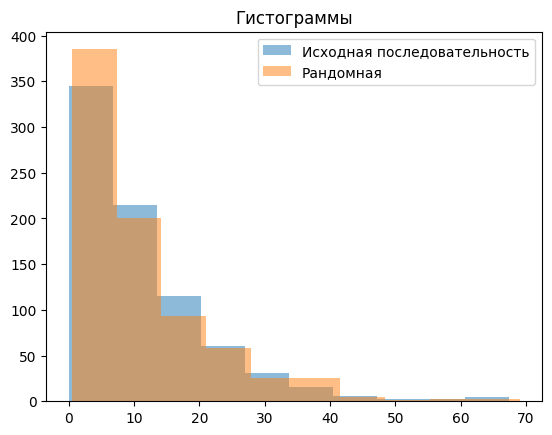

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import linalg
import statistics as st
import pandas as pd

points = np.random.uniform(10.5, max(A), size = 799) #случайные точки
temp = [0]*len(points)
for i in range(len(points)):
  for j in range(1, len(A)):
    if points[i]>=A[j-1] and points[i]<A[j]:
      temp[i] = j
A_1 = [0]*len(temp)
for i in range(len(temp)):
  A_1[i] = A[temp[i]] - points[i]
plt.title("Гистограммы")
plt.hist(A_1, alpha = 0.5)
plt.hist(B, alpha = 0.5)
plt.legend(('Исходная последовательность','Рандомная'))
#Критерий М-У-У
res_1 = ss.ttest_ind(A_1, B)
res = ss.mannwhitneyu(A_1, B, method="asymptotic")

print("Значение критерия М-У-У: ", res.statistic, res.pvalue )
print("Значение t-критерия: ", res_1.statistic, res_1.pvalue)